# Homework

# 📊 Задание по методам валидации в машинном обучении

## 1. Загрузка и предобработка данных
- 📥 **Загрузите набор данных** Bank Customer Churn Prediction и обработайте пропуски.
- 🔄 **Разделите данные на признаки (X) и целевую переменную (y).**
- 📈 **Выведите корреляционную сортированную таблицу** признаков и таргета для определения самых важных признаков, которые влияют на целевую переменную (либо в виде сортированного графика).
- 📊 **Выведите распределение целевой переменной в процентном соотношении.**

---

## 2. Удерживающая проверка (Hold-Out CV)
- ✂️ **Разделите данные на обучающую и тестовую выборки** в соотношении 80/20.
- 🧠 **Обучите модель** CatBoostClassifier с использованием обучающей выборки.
- 📊 **Оцените её производительность** на тестовой выборке, используя метрику AUC.

---

## 3. k-блочная перекрестная проверка (k-Fold CV)
- 🔁 **Реализуйте k-Fold перекрестную проверку** с использованием 5 блоков.
- 📊 **Вычислите среднее значение AUC** для всех блоков.

---

## 4. Стратифицированный k-Fold CV
- ⚖️ **Выполните стратифицированную k-Fold перекрестную проверку**.
- 🔍 **Сравните результаты** со стандартной k-Fold проверкой.
- 📝 **Объясните, в чем преимущество стратифицированного подхода.**

---

## 5. Перекрестная проверка с исключением одного (LOOCV)
- 🔄 **Реализуйте метод LOOCV**.
- 📊 **Сравните полученные результаты** с предыдущими методами. Если алгоритм работает долго, попробуйте сократить количество подаваемых строк.

---

## 6. Подготовка сравнительной таблицы
- 📊 **Подготовьте сравнительную таблицу для 4 методов валидации точности модели** (type of CV, std, mean).

---

## 7. Задание на доп балл
- 🏆 **Выведите таблицу с метриками** для порогов отсечения 0.05, 0.1, 0.15, 0.25, 0.3 для положительного класса (Только для Hold-Out CV).

---

**PS:** Качество модели необходимо рассчитать не только по метрике AUC, но и по 3 другим метрикам на ваш выбор для пунктов 2-5.

## Задание по методам валидации в машинном обучении

In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [2]:
paht_to_data = '/Users/bad_boy/Личное/data_science/Bank Customer Churn Prediction.csv'

data = pd.read_csv(paht_to_data)

missing_data = data.isnull().sum()

print(missing_data[missing_data > 0])

Series([], dtype: int64)


In [3]:
X = data.drop(columns=['churn', 'customer_id'])
y = data['churn']

churn               1.000000
age                 0.285323
country_Germany     0.173488
balance             0.118533
estimated_salary    0.012097
credit_card        -0.007138
tenure             -0.014001
credit_score       -0.027094
products_number    -0.047820
country_Spain      -0.052667
gender_Male        -0.106512
active_member      -0.156128
Name: churn, dtype: float64


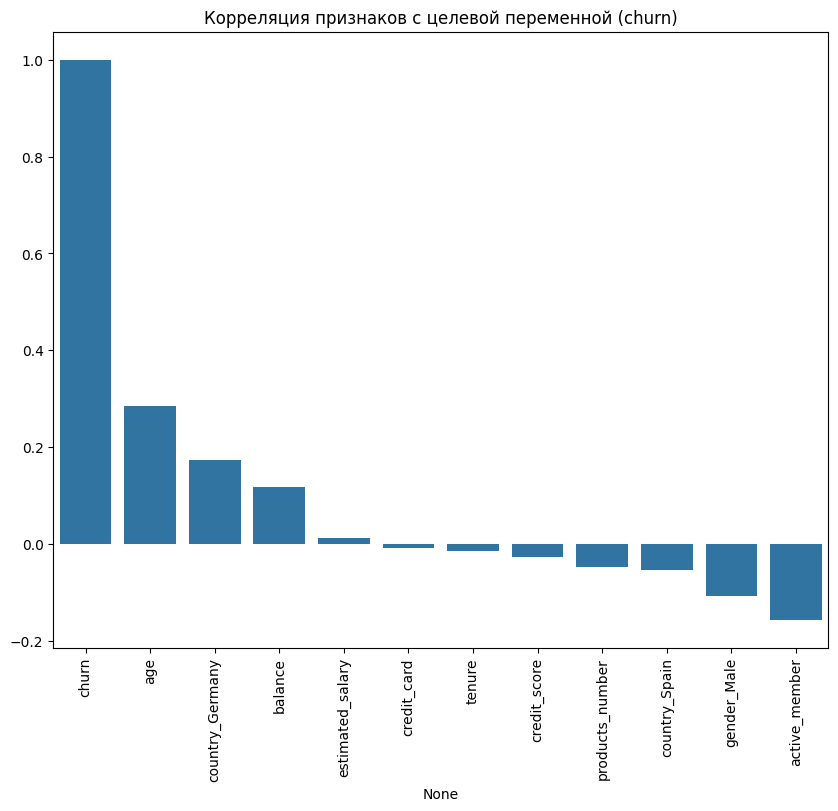

In [4]:
data_encoded = pd.get_dummies(data.drop(columns=['customer_id']), drop_first=True)

correlation_matrix = data_encoded.corr()

correlation_with_target = correlation_matrix['churn'].sort_values(ascending=False)

print(correlation_with_target)

plt.figure(figsize=(10, 8))
sns.barplot(x=correlation_with_target.index, y=correlation_with_target.values)
plt.title('Корреляция признаков с целевой переменной (churn)')
plt.xticks(rotation=90)
plt.show()

churn
0    79.63
1    20.37
Name: proportion, dtype: float64


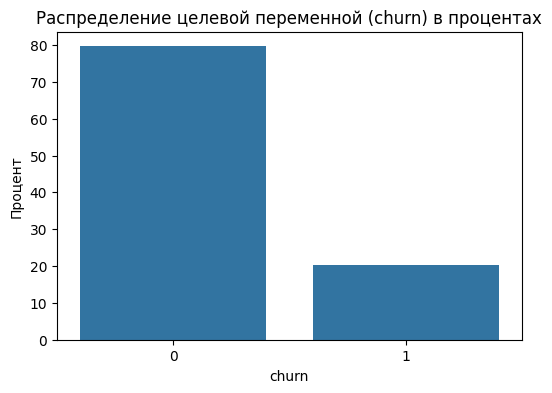

In [5]:
target_distribution = y.value_counts(normalize=True) * 100

print(target_distribution)

plt.figure(figsize=(6, 4))
sns.barplot(x=target_distribution.index, y=target_distribution.values)
plt.title('Распределение целевой переменной (churn) в процентах')
plt.ylabel('Процент')
plt.show()

## 2. Удерживающая проверка (Hold-Out CV)

In [6]:
from sklearn.metrics import roc_auc_score, accuracy_score, precision_score, recall_score, f1_score
from sklearn.model_selection import train_test_split
from catboost import CatBoostClassifier

In [7]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [8]:
cat_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
cat_features_indices = [X_train.columns.get_loc(col) for col in cat_features]

X_train = X_train.astype(str)

model = CatBoostClassifier(random_state=42, depth=6, eval_metric='AUC', verbose=0)
model.fit(X_train, y_train, cat_features=cat_features_indices)

In [9]:
y_pred_proba = model.predict_proba(X_test)[:, 1]
auc_score = roc_auc_score(y_test, y_pred_proba)
print(f"AUC на тестовой выборке: {auc_score:.4f}")

AUC на тестовой выборке: 0.8729


In [10]:
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy:.4f}")

Accuracy: 0.8670


In [11]:
precision = precision_score(y_test, y_pred)
print(f"Precision: {precision:.4f}")

Precision: 0.7378


In [12]:
recall = recall_score(y_test, y_pred)
print(f"Recall: {recall:.4f}")

Recall: 0.5013


In [13]:
f1 = f1_score(y_test, y_pred)
print(f"F1-Score: {f1:.4f}")

F1-Score: 0.5970


## 3. K-блочная перекрестная проверка (k-Fold CV)

In [19]:
from sklearn.model_selection import KFold
import numpy as np

In [20]:
X = data.drop(columns=['churn', 'customer_id'])
y = data['churn']

In [21]:
model = CatBoostClassifier(random_state=42, depth=6, eval_metric='AUC', verbose=0)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [23]:
auc_scores = []
for train_index, test_index in kf.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    cat_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
    cat_features_indices = [X_train.columns.get_loc(col) for col in cat_features]
    X_train = X_train.astype(str)
    
    model.fit(X_train, y_train, cat_features=cat_features_indices)
    
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    auc = roc_auc_score(y_test, y_pred_proba)
    auc_scores.append(auc)


Среднее значение AUC для всех блоков: 0.8670


In [ ]:
mean_auc = np.mean(auc_scores)
print(f'Среднее значение AUC для всех блоков: {mean_auc:.4f}')

## 4. Стратифицированный k-Fold CV

In [24]:
from sklearn.model_selection import StratifiedKFold

In [25]:
X = data.drop(columns=['churn', 'customer_id'])
y = data['churn']

In [26]:
model = CatBoostClassifier(random_state=42, depth=6, eval_metric='AUC', verbose=0)
skf = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)
kf = KFold(n_splits=5, shuffle=True, random_state=42)

In [27]:
def perform_cross_validation(cv_splitter, X, y):
    auc_scores = []
    for train_index, test_index in cv_splitter.split(X, y):
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
        
        cat_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
        cat_features_indices = [X_train.columns.get_loc(col) for col in cat_features]
        
        X_train = X_train.astype(str)
        
        model.fit(X_train, y_train, cat_features=cat_features_indices)
        
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        
        auc = roc_auc_score(y_test, y_pred_proba)
        auc_scores.append(auc)
    
    return np.mean(auc_scores)

In [28]:
mean_stratified_auc = perform_cross_validation(skf, X, y)

In [29]:
mean_kf_auc = perform_cross_validation(kf, X, y)

In [30]:
print(f'Среднее значение AUC для Stratified k-Fold: {mean_stratified_auc:.4f}')
print(f'Среднее значение AUC для стандартного k-Fold: {mean_kf_auc:.4f}')

Среднее значение AUC для Stratified k-Fold: 0.8682
Среднее значение AUC для стандартного k-Fold: 0.8670


## 5. Перекрестная проверка с исключением одного (LOOCV)

In [31]:
from sklearn.model_selection import LeaveOneOut

In [32]:
X = data.drop(columns=['churn', 'customer_id'])
y = data['churn']

In [33]:
model = CatBoostClassifier(random_state=42, depth=6, eval_metric='AUC', verbose=0)

In [34]:
loo = LeaveOneOut()

In [36]:
loo_auc_scores = []
for train_index, test_index in loo.split(X):
    X_train, X_test = X.iloc[train_index], X.iloc[test_index]
    y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    
    cat_features = X_train.select_dtypes(include=['object', 'category']).columns.tolist()
    cat_features_indices = [X_train.columns.get_loc(col) for col in cat_features]
    
    X_train = X_train.astype(str)
    
    model.fit(X_train, y_train, cat_features=cat_features_indices)
    
    y_pred_proba = model.predict_proba(X_test)[:, 1]
    
    if len(np.unique(y_test)) > 1:
        auc = roc_auc_score(y_test, y_pred_proba)
        loo_auc_scores.append(auc)

In [ ]:
mean_loo_auc = np.mean(loo_auc_scores)
print(f'Среднее значение AUC для LOOCV: {mean_loo_auc:.4f}')

In [ ]:
print(f'Среднее значение AUC для Stratified k-Fold: {mean_stratified_auc:.4f}')
print(f'Среднее значение AUC для стандартного k-Fold: {mean_kf_auc:.4f}')